In [1]:
import os,sys
import math

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sys.path.append("../src")  # adjust path as needed
from read_Parkinsonpredict import ReadData, LoadData

If throws an error, probably needs you to do 'conda install vtk' in the erodos_summer_2025' environment

### Data Analysis

In [2]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/'

data = pd.read_csv(path + 'merged_all.csv')
data.describe()

,PATNO,MRIRSLT,lh_MeanThickness,rh_MeanThickness,lh_WhiteSurfArea,rh_WhiteSurfArea,rhCerebralWhiteMatterVol,lhCerebralWhiteMatterVol,Left_Cerebellum_White_Matter,Right_Cerebellum_White_Matter,...,ENSG00000158828,ENSG00000145335,ENSG00000159082,ENSG00000116288,ENSG00000116675,ENSG00000177628,ENSG00000100225,ENSG00000184381,NHY_BL,NHY
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,6189.293413,1.434132,2.340567,2.336678,84830.179042,84836.398802,257962.149701,258676.661677,15571.854491,14850.662575,...,21.559077,728.745216,18.449139,44.620138,4.731756,3.841937,211.230057,12.095339,0.952096,1.434132
std,12859.306025,0.542630,0.193055,0.191488,7863.847551,7821.214110,51349.389866,50851.709779,3151.018725,2607.464177,...,9.499965,476.219587,5.656084,13.322180,6.056762,1.747194,115.964633,4.687634,0.872044,1.259261
min,3000.000000,1.000000,1.531180,1.544100,64322.600000,62867.300000,174076.000000,170758.000000,6692.600000,5357.300000,...,3.498360,102.228000,3.365450,9.930270,0.666783,0.870590,26.605000,2.201580,0.000000,0.000000
25%,3320.500000,1.000000,2.280112,2.276918,79738.850000,79387.175000,228019.500000,229001.250000,13713.900000,13287.900000,...,15.174950,378.185250,15.013850,36.374125,2.382293,2.759560,122.791750,8.657295,0.000000,0.000000
50%,3602.000000,1.000000,2.375435,2.379275,84560.950000,84572.550000,248766.500000,248887.500000,15199.700000,14538.400000,...,20.184150,611.325000,18.705550,43.186350,3.498500,3.383900,191.145500,11.331450,1.000000,2.000000
75%,3904.750000,2.000000,2.454135,2.450690,89987.350000,89910.150000,272049.500000,273037.000000,17091.225000,16327.100000,...,26.019625,932.784250,21.727725,51.386550,5.470840,4.559102,270.208250,14.862625,2.000000,2.000000
max,92834.000000,3.000000,2.699680,2.665090,111841.000000,113294.000000,521300.000000,513308.000000,29617.600000,25458.600000,...,60.187100,2953.630000,37.629100,110.303000,92.464400,12.918900,754.266000,25.163700,3.000000,5.000000


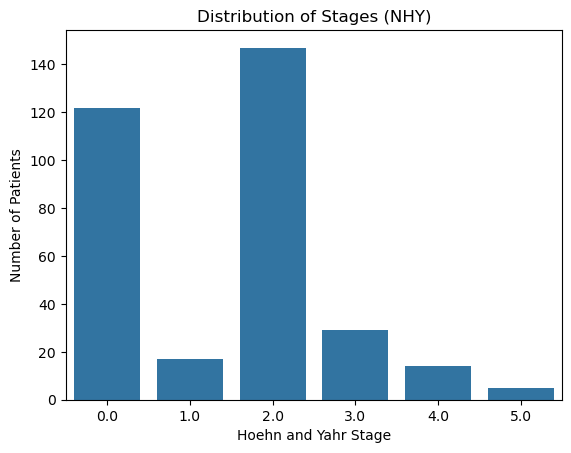

In [3]:
sns.countplot(data=data, x='NHY')
plt.title("Distribution of Stages (NHY)")
plt.xlabel("Hoehn and Yahr Stage")
plt.ylabel("Number of Patients")
plt.show()

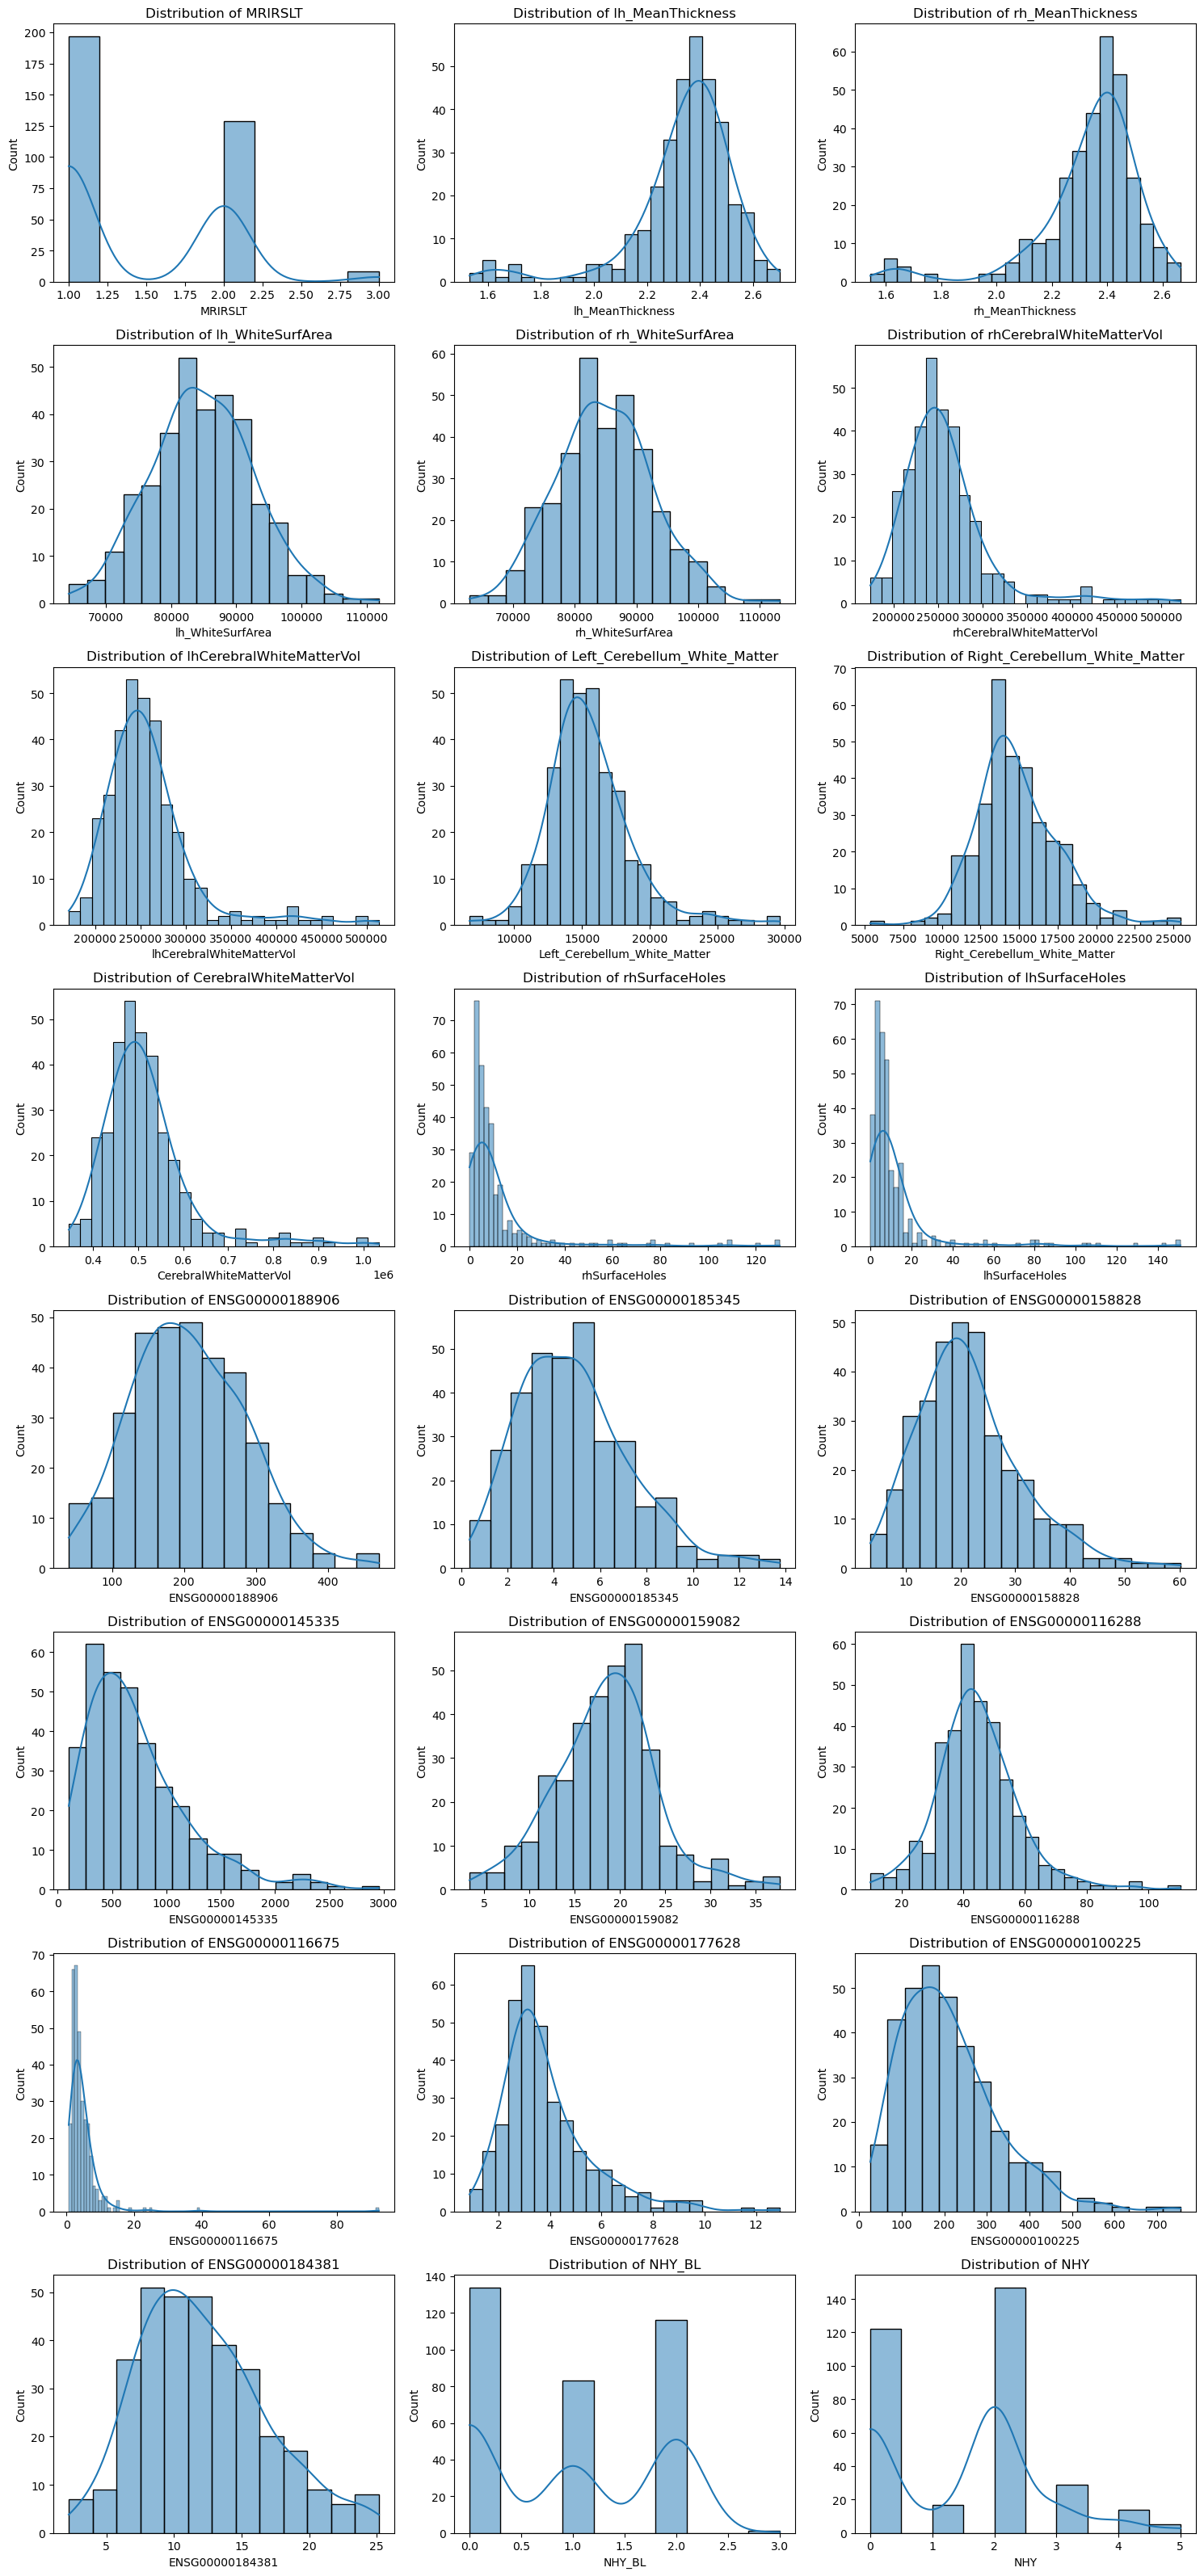

In [11]:
# Filter numerical columns except for ID fields
plot_cols = [col for col in data.columns if data[col].dtype != 'object' and col not in ['PATNO', 'EVENT_ID']]
n_cols = 3  
n_rows = math.ceil(len(plot_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()  

for idx, col in enumerate(plot_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

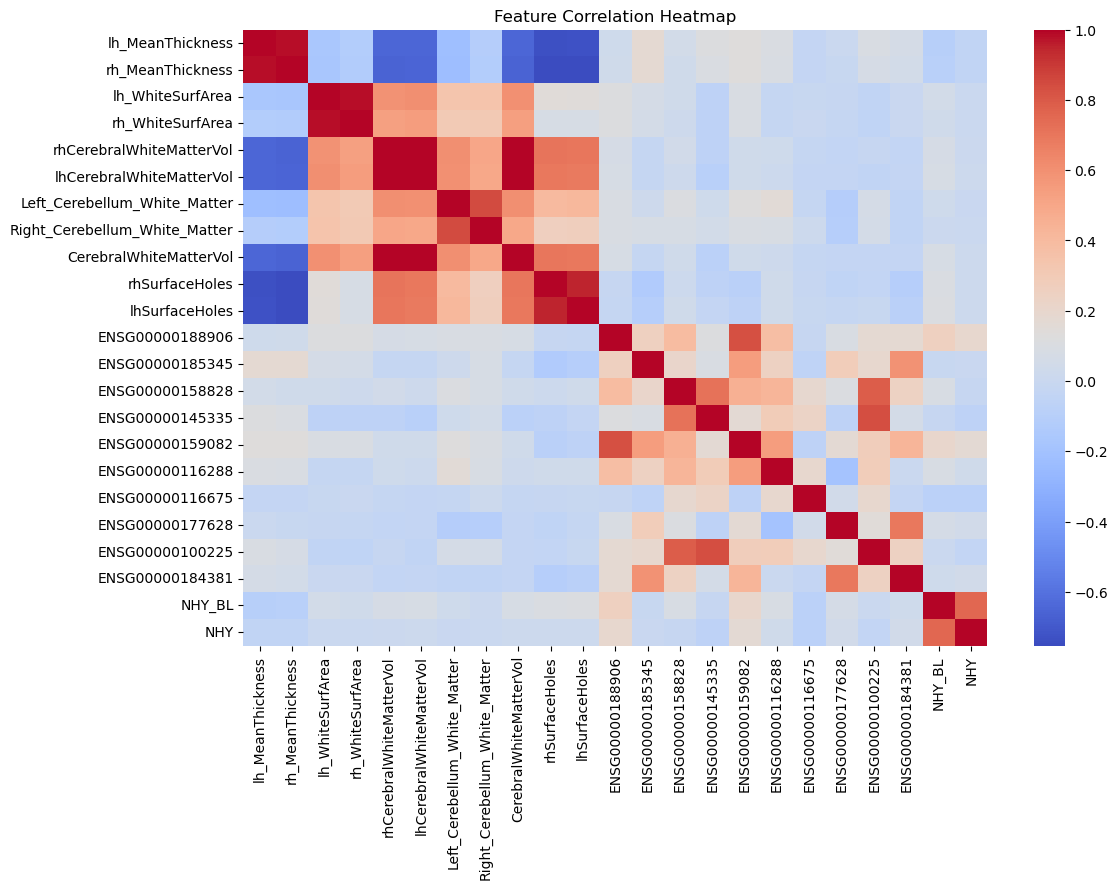

In [5]:
data_plt = data.drop(columns=["PATNO", "MRIRSLT"])
plt.figure(figsize=(12, 8))
sns.heatmap(data_plt.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

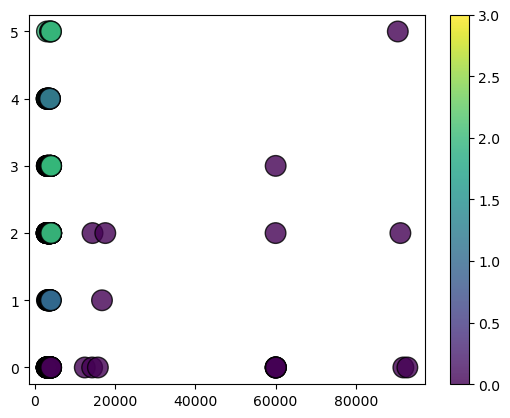

In [ ]:

plt.scatter(data['PATNO'], data["NHY"], c=data["NHY_BL"], s = 220, alpha=0.8, edgecolors='k')
plt.colorbar()

### Feature selection

In [2]:
path = '/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/fomatted_data/'
data = LoadData(input_path=path)
X_train, Y_train = data.merged_data()


Is PATNO sorted?: True
Do we have all unique patients?: Yes
The train and test data is split according to 80.0 - 20.0%


### PCA for feature selection

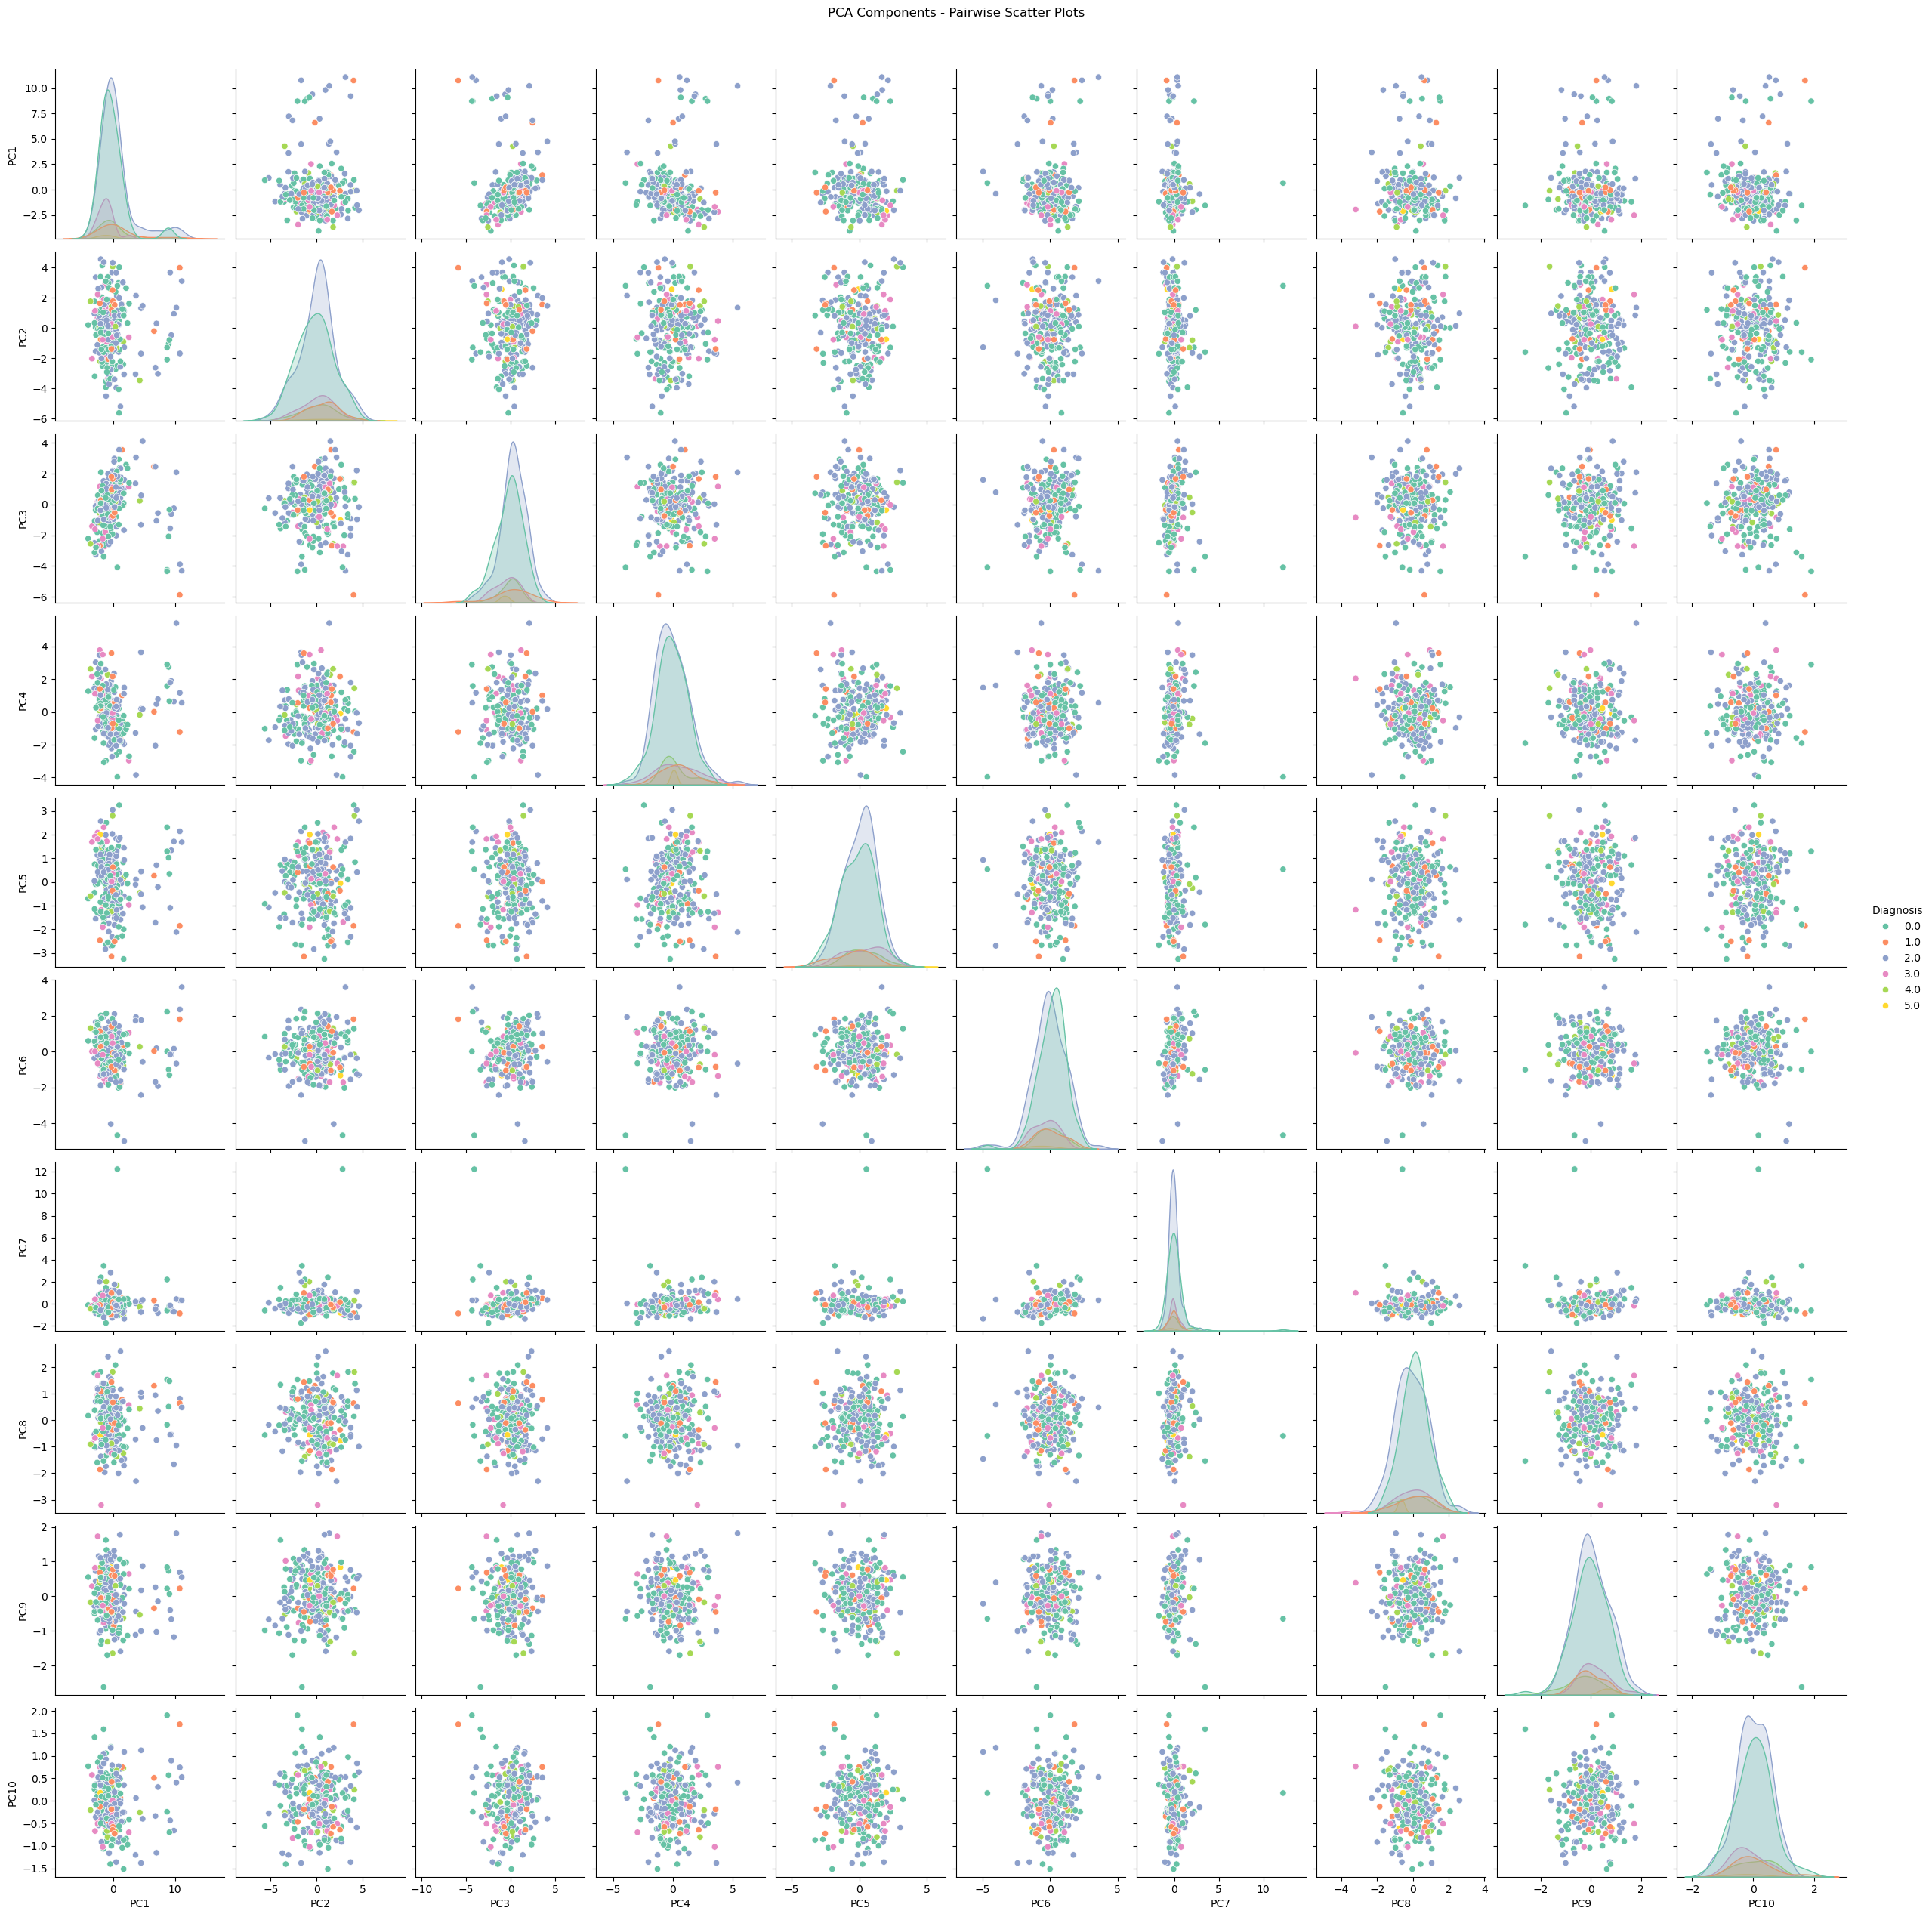

In [3]:

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Step 3: Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Combine with diagnosis or target column for coloring
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df["Diagnosis"] = Y_train['NHY']  # Or use DIAGNOSIS if available

# Plot pairwise scatter plots
sns.pairplot(pca_df, hue="Diagnosis", diag_kind="kde", palette="Set2")
plt.suptitle("PCA Components - Pairwise Scatter Plots", y=1.02)
plt.show()

### Number of PCA components necessary

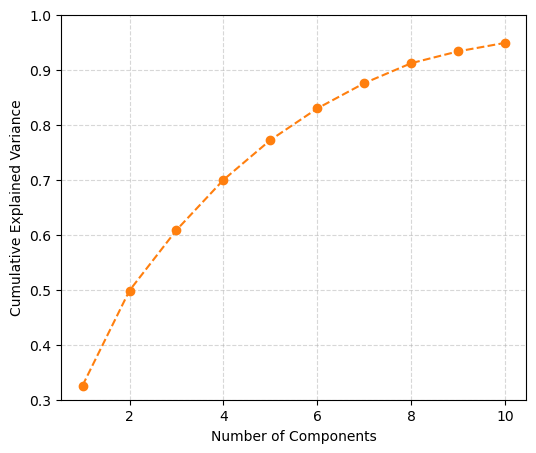

In [4]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
fig = plt.figure(figsize=(6,5),dpi=100)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o--',color='tab:orange')
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.ylim(0.3,1)
plt.show()

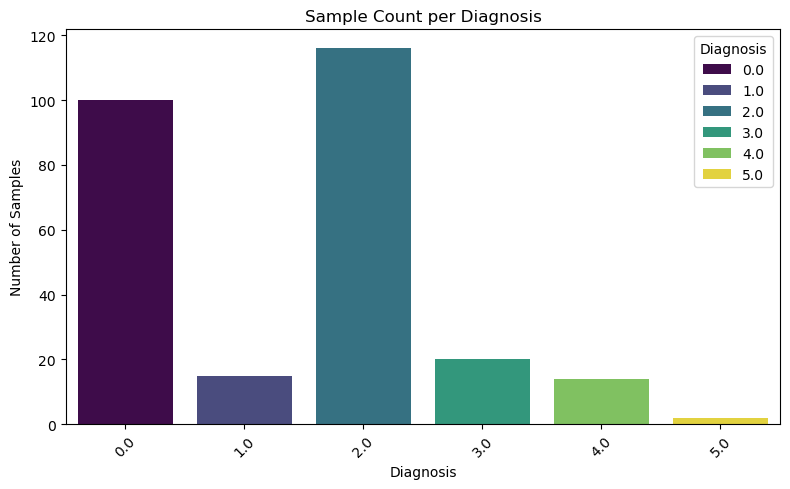

In [5]:
diagnosis_counts = Y_train.value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Diagnosis', y='Count', data=diagnosis_counts, hue='Diagnosis', palette='viridis')
plt.title('Sample Count per Diagnosis')
plt.ylabel('Number of Samples')
plt.xlabel('Diagnosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()